# Data pre-processing
## <u>Description</u>:
The original dataset was downloaded from . It contains 18,207 rows of data spread across 88 columns.|

We have taken the liberty of dropping, from this dataset, columns that we've deemed irrelevant to our analysis.

In [6]:
%run s0_fifa_players_functions.ipynb

# 1) Load raw dataset
## The raw dataset is stored in project folder: /resources

In [7]:
import config as creds

In [8]:
from pathlib import Path

dataset_location = Path('../resources','fifa_world_players_alt.csv')

raw_data = create_fifa_players_dataframe(dataset_location)
# display(raw_data.shape)

# 2) Create fifa players datasets
## - goalkeepers dataset

In [16]:

# Connect to DB
conn, cursor= connect()

import pandas
sql = """ SELECT * from players where field_position = 'GK' """

goal_keepers_data = pandas.read_sql(sql, con=conn)
# display(goal_keepers_data)
conn.commit()

# Disconnect from DB
disconnect(conn, cursor)

goal_keepers_data = create_players_dataframes(goal_keepers_data, cols_to_drop_for_keepers, 0)

# # save data set: goal_keepers.csv
# # save column names to create sql schema
# goal_keepers_data = create_fifa_players_dataset(goal_keepers_data, '../resources/', 'goal_keepers_schema.txt', 'goal_keepers.csv', 0)
# # Test data loading
# def test_keepers_load(cursor):

display(goal_keepers_data)

Connected!


,player_id,player_name,age,photo,nationality,country_flag,overall,potential,club,club_logo,...,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,193080,De Gea,27.0,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
1,200389,J. Oblak,25.0,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0
2,192448,M. ter Stegen,26.0,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0
3,192119,T. Courtois,26.0,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0
4,167495,M. Neuer,32.0,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,47.0,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,243158,L. Wahlstedt,18.0,https://cdn.sofifa.org/players/4/19/243158.png,Sweden,https://cdn.sofifa.org/flags/46.png,48,65,Dalkurd FF,https://cdn.sofifa.org/teams/2/light/113876.png,...,12.0,28.0,16.0,11.0,10.0,47.0,46.0,50.0,45.0,51.0
2021,221669,M. Hurst,22.0,https://cdn.sofifa.org/players/4/19/221669.png,Scotland,https://cdn.sofifa.org/flags/42.png,48,58,St. Johnstone FC,https://cdn.sofifa.org/teams/2/light/100804.png,...,29.0,28.0,12.0,15.0,16.0,45.0,49.0,50.0,50.0,45.0
2022,53748,K. Pilkington,44.0,https://cdn.sofifa.org/players/4/19/53748.png,England,https://cdn.sofifa.org/flags/14.png,48,48,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,22.0,56.0,15.0,15.0,13.0,45.0,48.0,44.0,49.0,46.0
2023,245862,J. Milli,18.0,https://cdn.sofifa.org/players/4/19/245862.png,Italy,https://cdn.sofifa.org/flags/27.png,47,65,Lecce,https://cdn.sofifa.org/teams/2/light/347.png,...,16.0,23.0,6.0,10.0,11.0,52.0,52.0,52.0,40.0,44.0


## - players dataset

In [10]:
players_data = create_dataset_by_pos(raw_data, ' ', cols_to_drop_for_players, 0)
players_data = create_fifa_players_dataset(players_data, '../resources/', 'players_schema.txt', 'players.csv', 0)


<ipython-input-6-3f7a3dbbbce3>:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_in['Rating'] = (col.mean(axis=1))


Wall time: 527 ms
Wall time: 771 ms


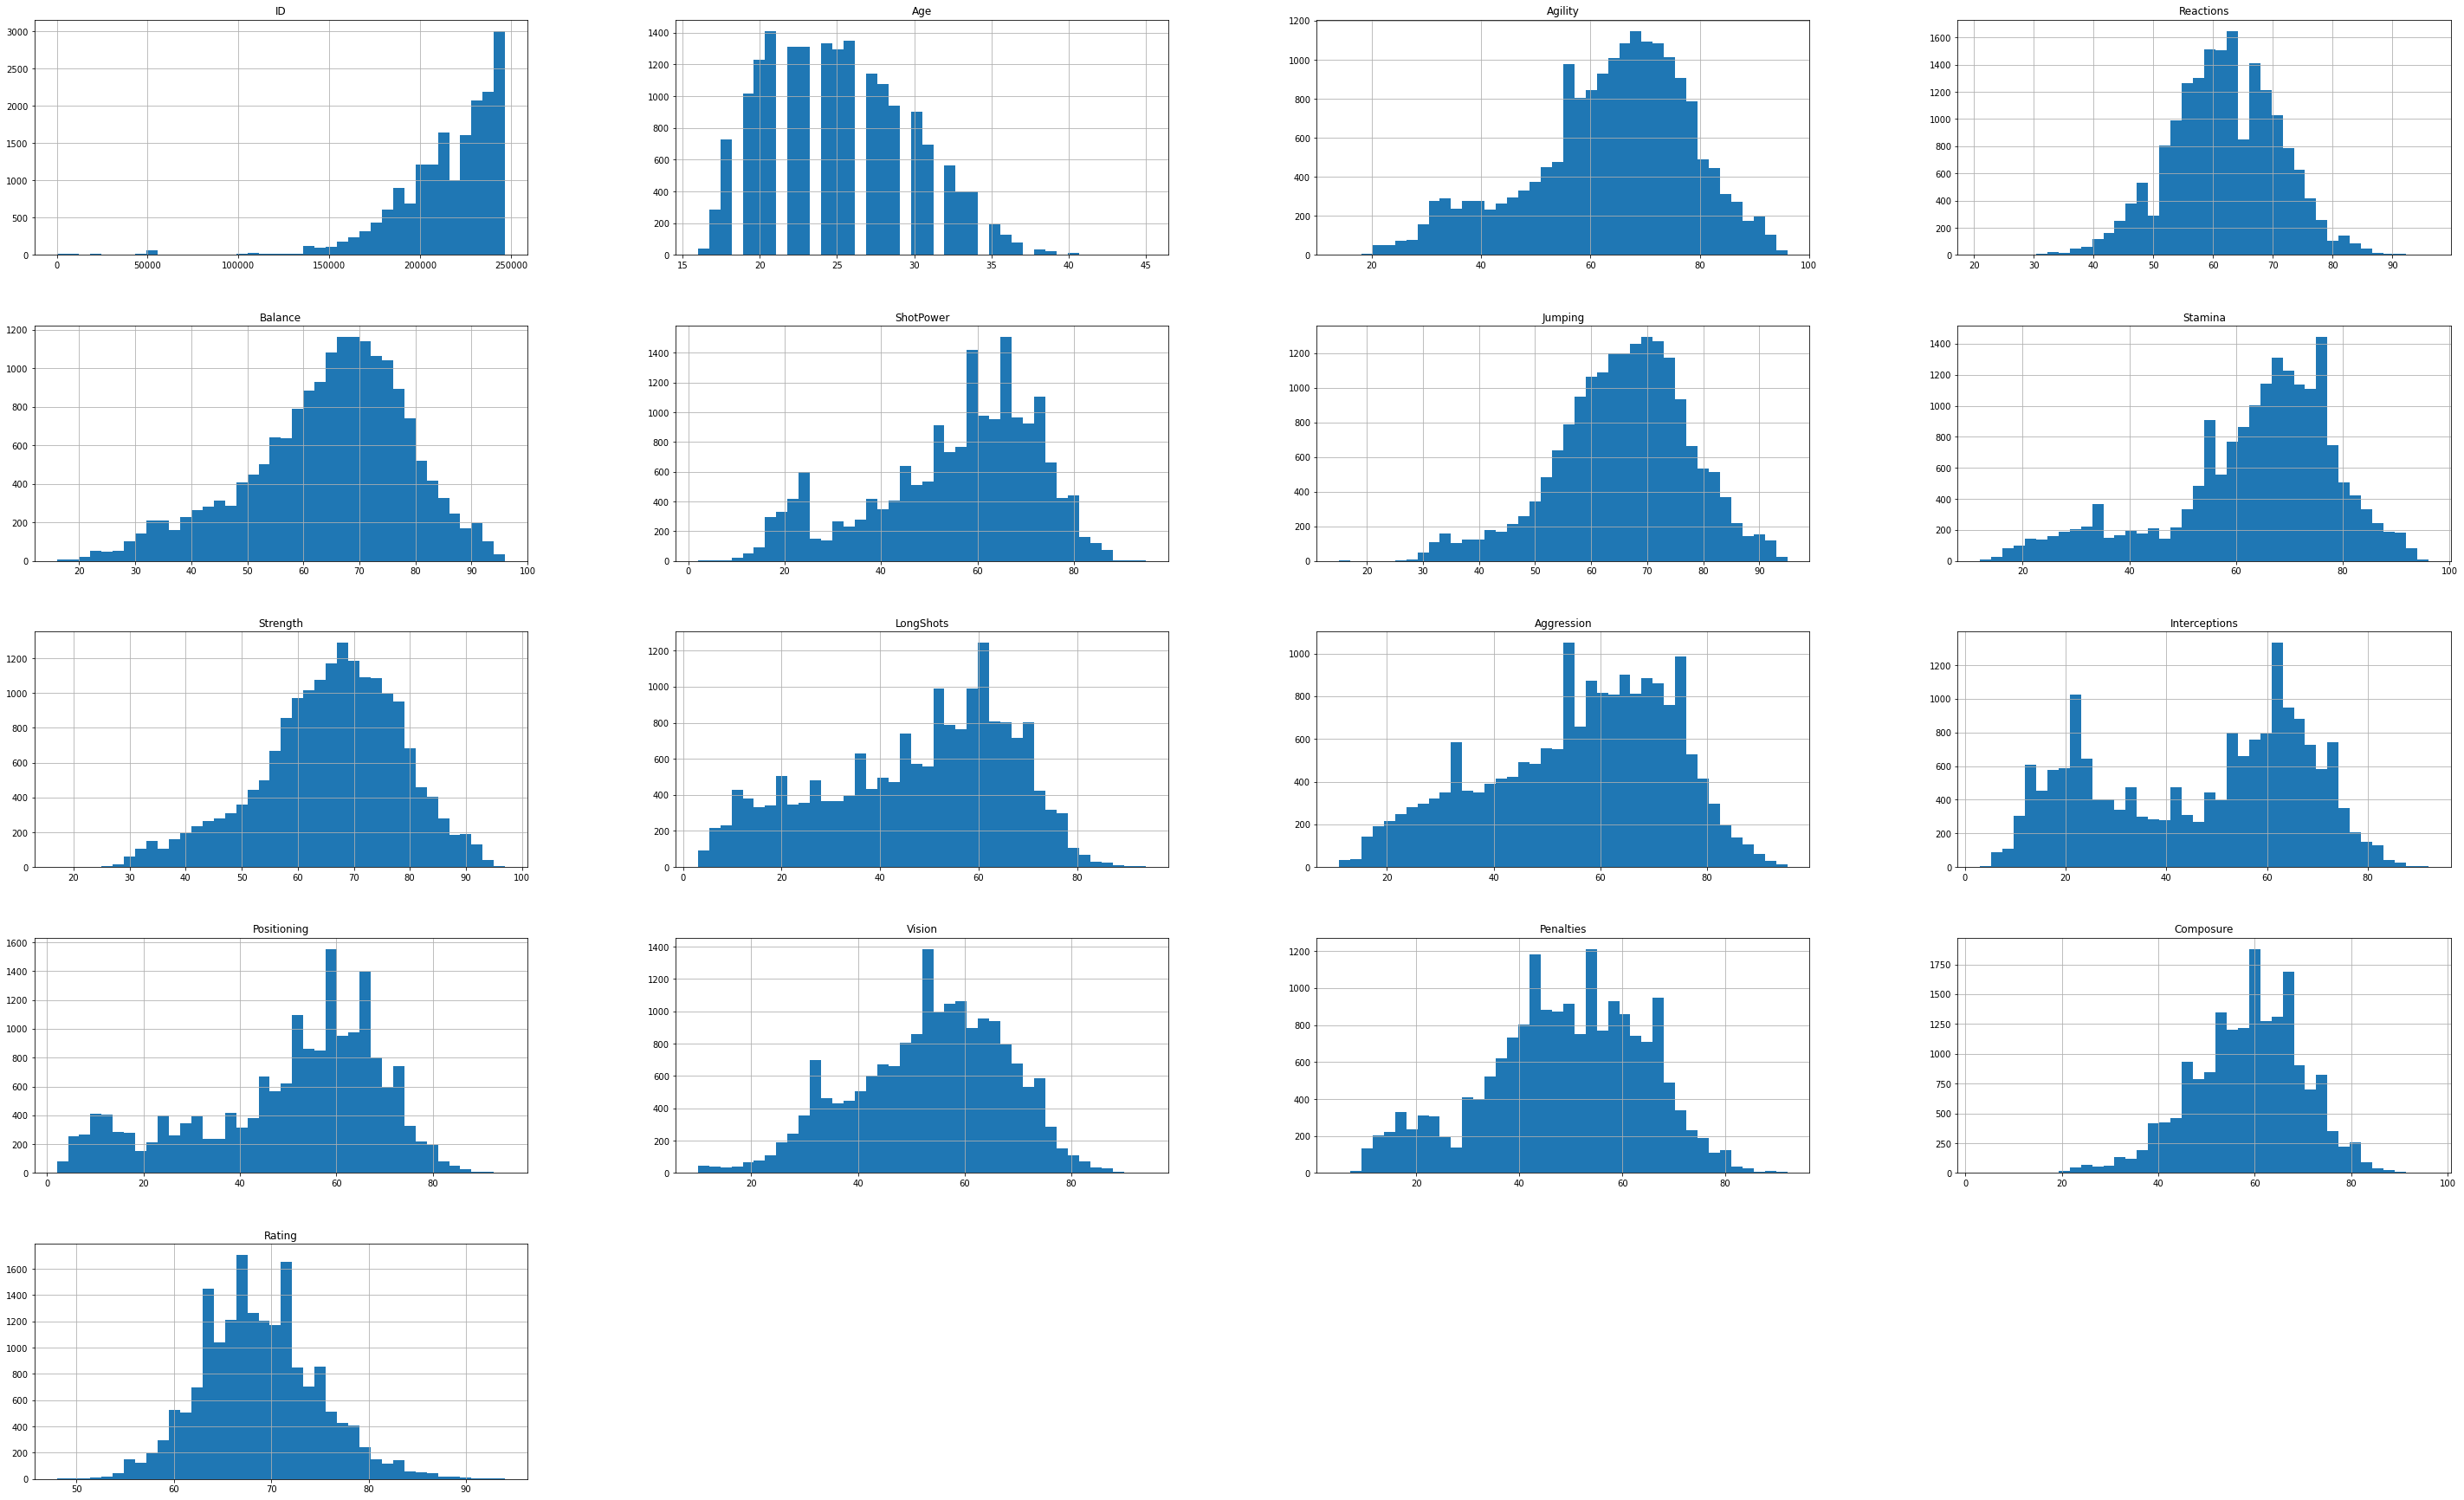

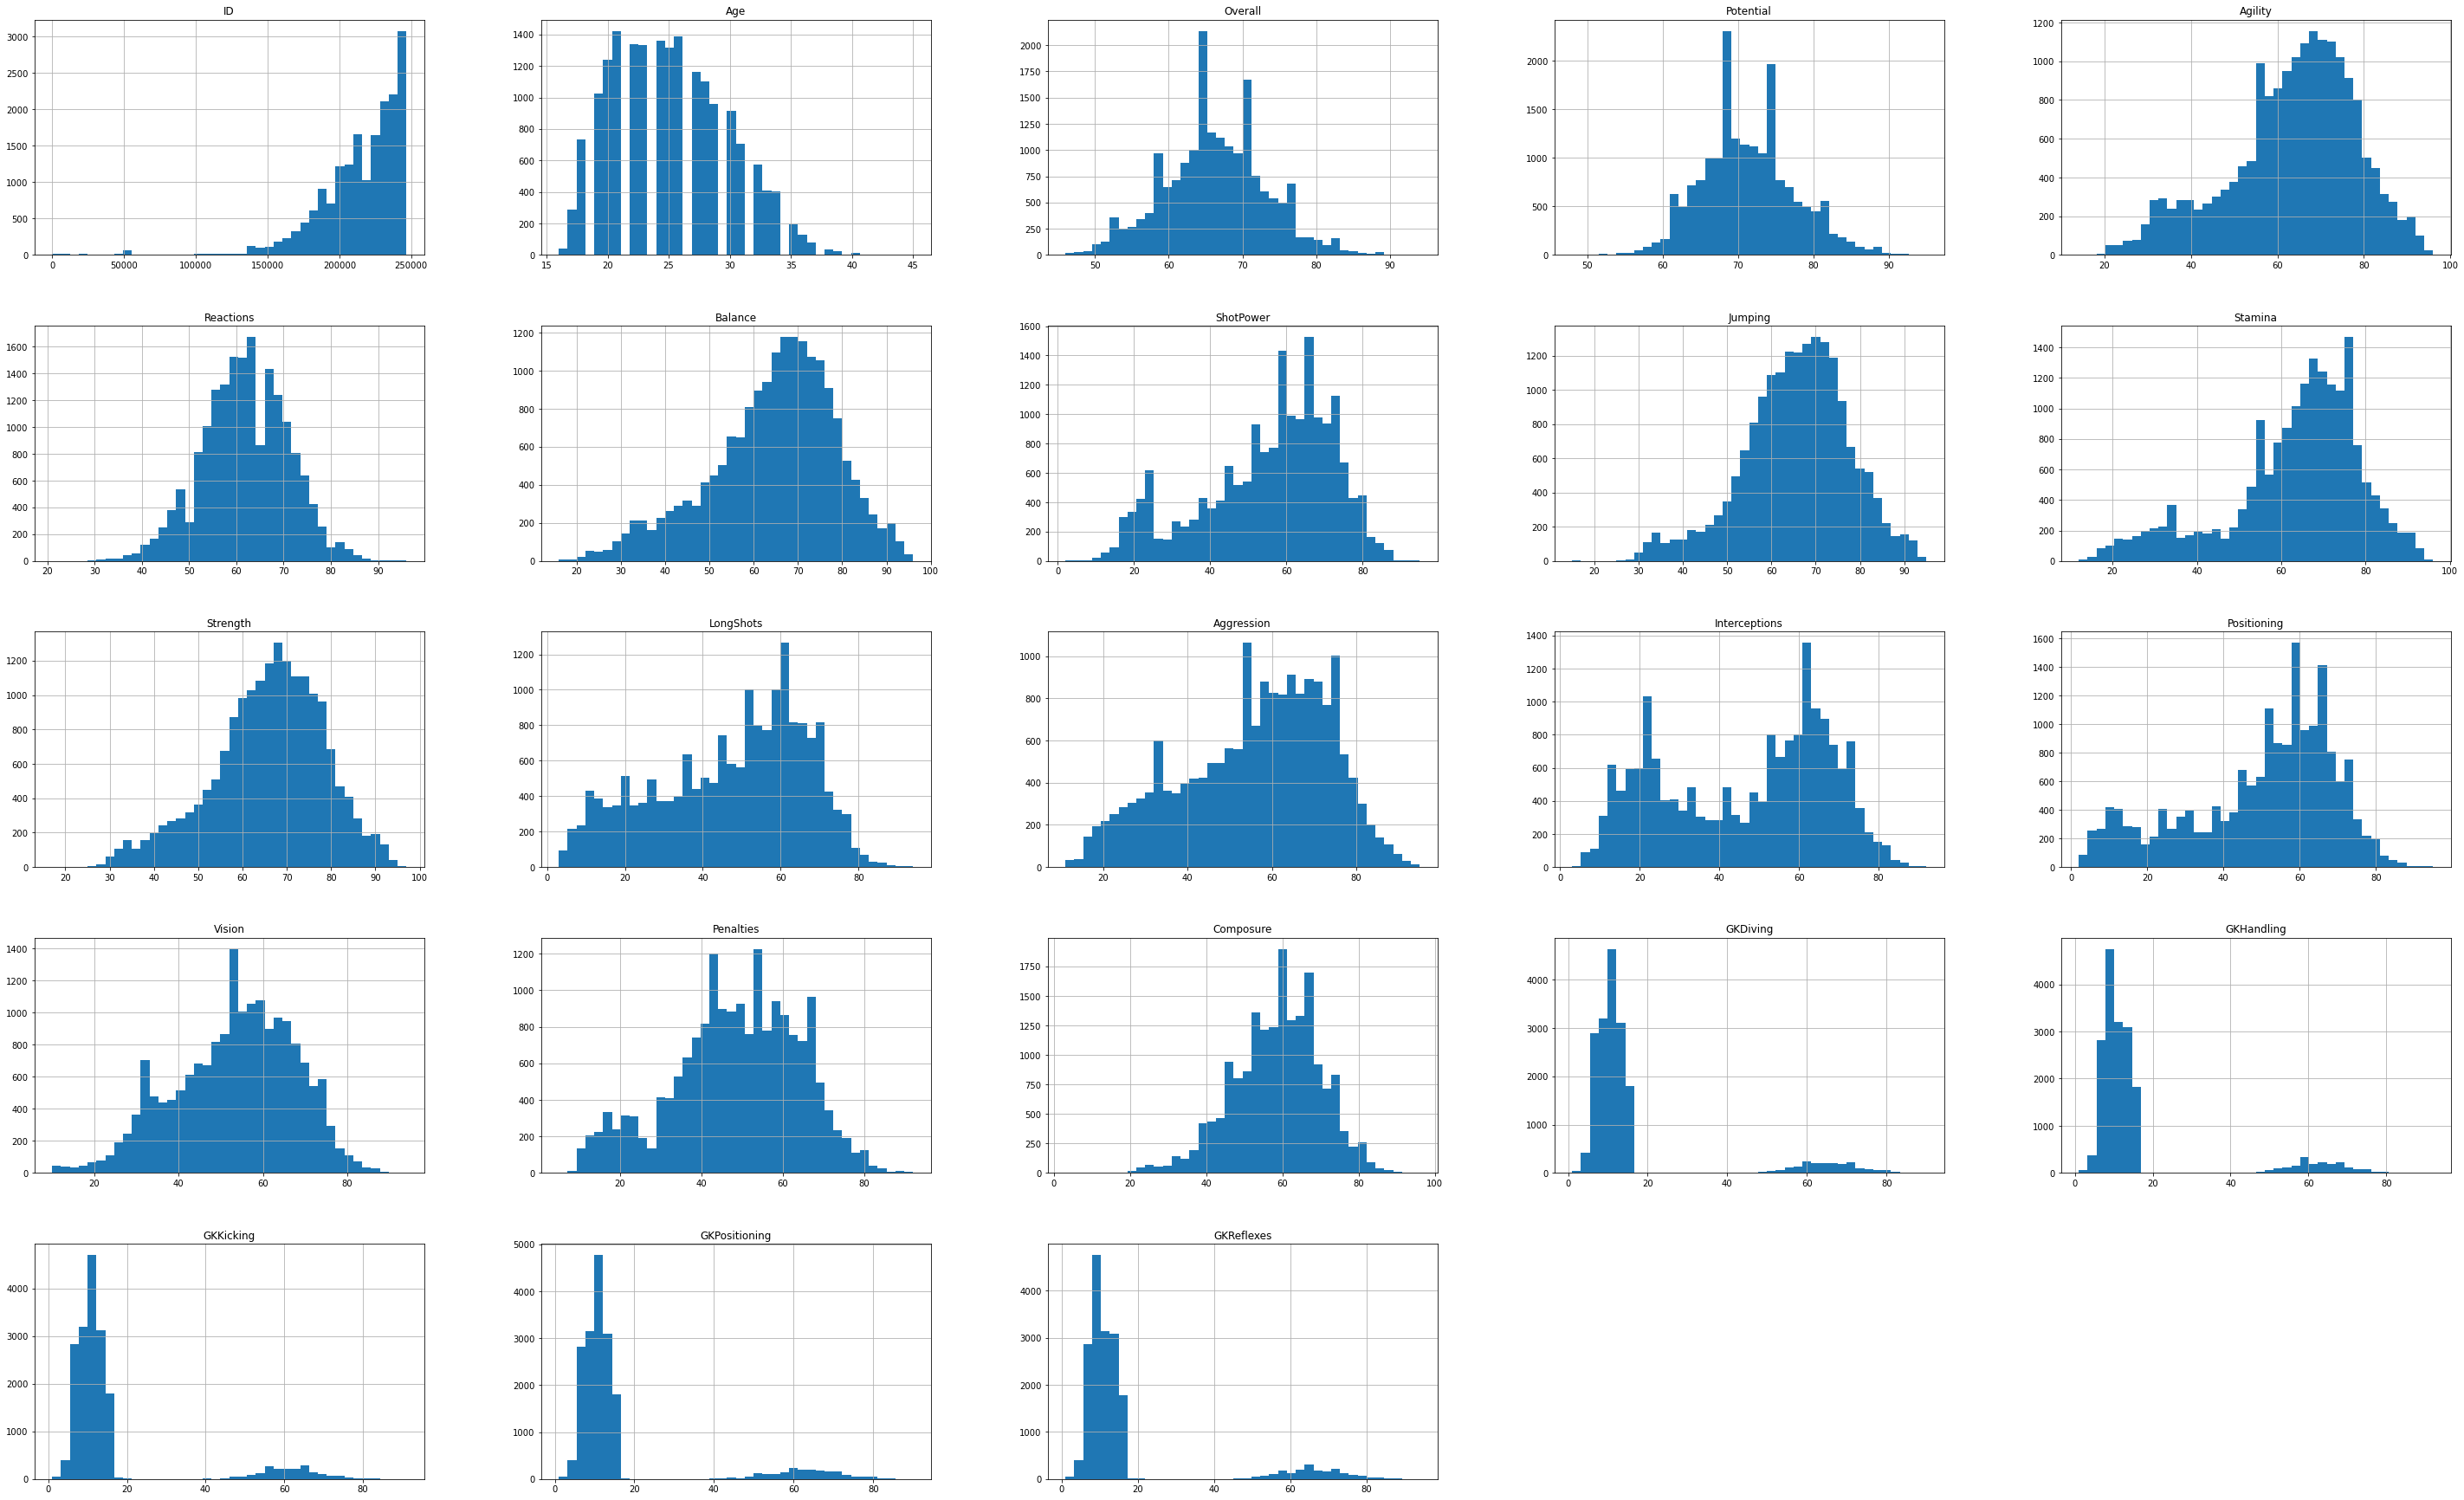

Wall time: 6.58 s


In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style

%time players_data.hist(bins=40, figsize=(50, 31))

%time goal_keepers_data.hist(bins=40, figsize=(50,31))
%time plt.show()